# <font color=Purple>COMP5310 - Project Stage 1 - Data Acquisition and Cleaning</font> ❤️‍🩹

<font color=Red>The code for Project Stage 3 is provided below, please scroll down vvvvv</font> 

In [344]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (3).csv


### <font color=Purple>Importing libraries</font>

In [225]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

### <font color=Purple>Reading the data</font>

In [226]:
heart_df = pd.read_csv('heart.csv')
heart_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [227]:
# Show first 10 rows
heart_df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [228]:
# Shape of dataframe
heart_df.shape

(918, 12)

In [229]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [230]:
heart_df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [231]:
# Numerical Variables
numerical = heart_df.select_dtypes(exclude = object).columns
numerical

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [232]:
# Categorical Variables
categorical = heart_df.select_dtypes(include = object).columns
categorical

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [233]:
# Descriptive statistics of dataset - mean, std, min, max etc
heart_df.describe().style.background_gradient(cmap = 'Purples')

In [234]:
# Check if there are any unique values
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<font color=Purple>Let's have a look at the correlation analysis of the dataset which will measure the strength and direction of the relationship between two variables.</font>

<Axes: >

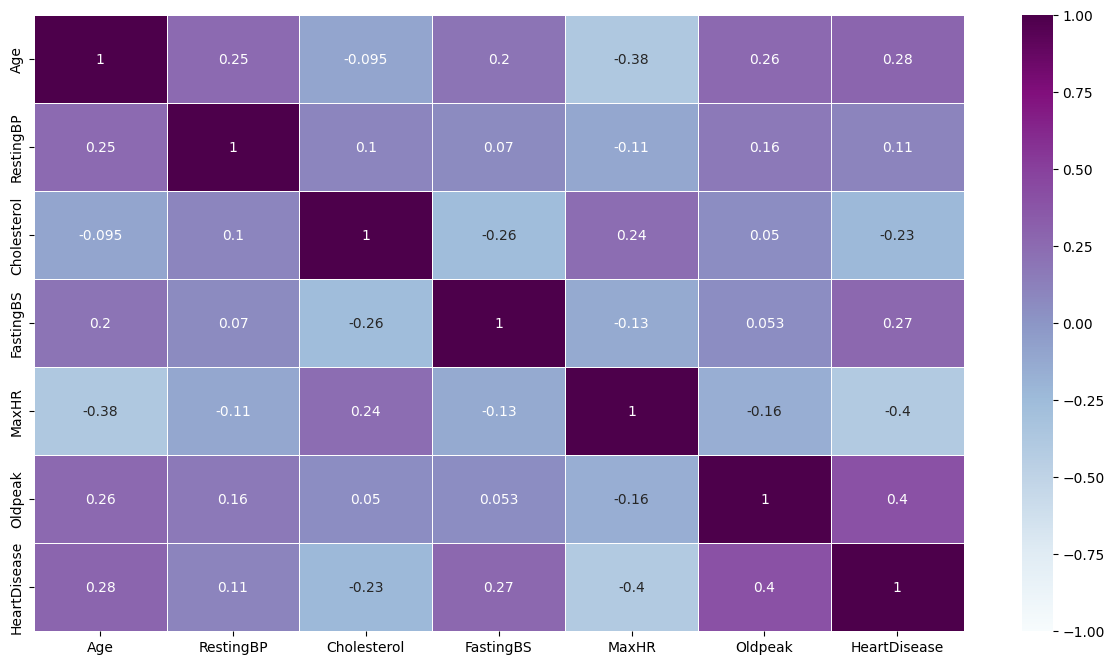

In [235]:
corr = heart_df.corr()
plt.figure(figsize = (15, 8))
sns.heatmap(corr, cmap = 'BuPu', vmin = -1, vmax = 1, center = 0,
           annot = True, linewidth = .5, square = False)

### <font color=Purple>Data Pre-processing</font>

<font color=Purple>The purpose of pre-processing the dataset is to identify any missing values, duplication and in general find any noteworthy observations.</font>

In [236]:
# To check null values
heart_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<font color=Purple>We observe no null values.</font>

In [237]:
# Check duplicate values
duplicates = heart_df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool


In [238]:
heart_df.drop_duplicates(inplace = True) 
heart_df.shape

(918, 12)

<font color=Purple>No observation of duplicate values in heart dataset. We can conclude this before the shape of the dataset is unchanged from output line 5.</font>

<font color=Purple>Let's explore the distribution for each of the columns to get a better understanding of the range of values prior to data analysis. The seaborn library will be particularly useful here. </font>

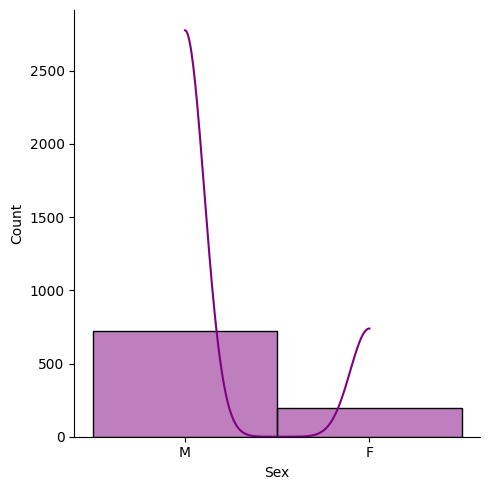

In [239]:
sns.displot(heart_df['Sex'], color = 'Purple', kde = True)

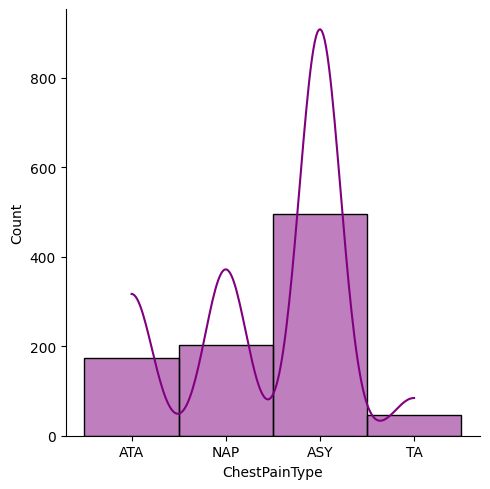

In [240]:
sns.displot(heart_df['ChestPainType'], color = 'Purple', kde = True)

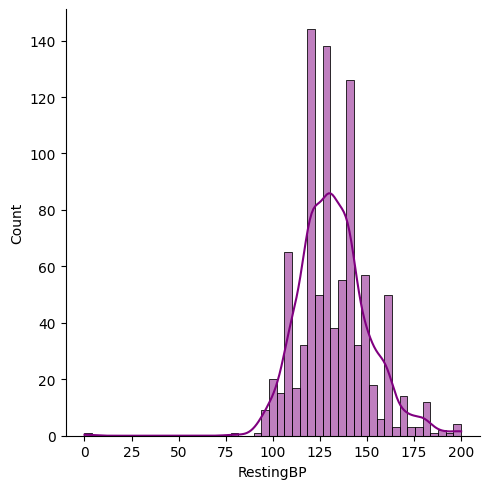

In [241]:
sns.displot(heart_df['RestingBP'], color = 'Purple', kde = True)

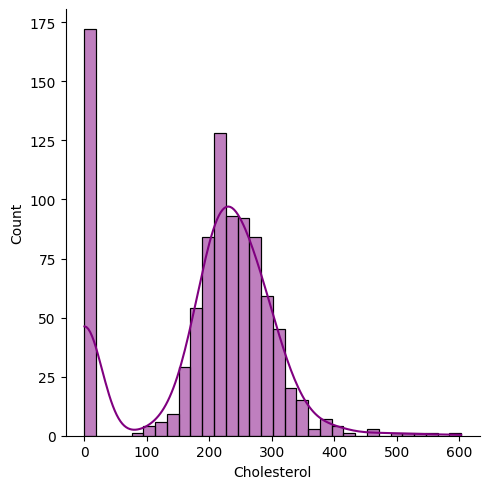

In [242]:
sns.displot(heart_df['Cholesterol'], color = 'Purple', kde = True)

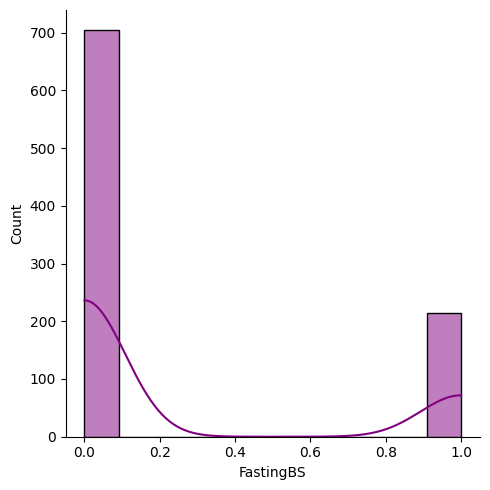

In [243]:
sns.displot(heart_df['FastingBS'], color = 'Purple', kde = True)

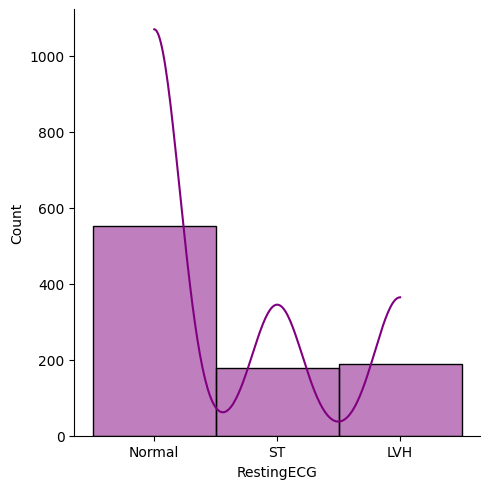

In [244]:
sns.displot(heart_df['RestingECG'], color = 'Purple', kde = True)

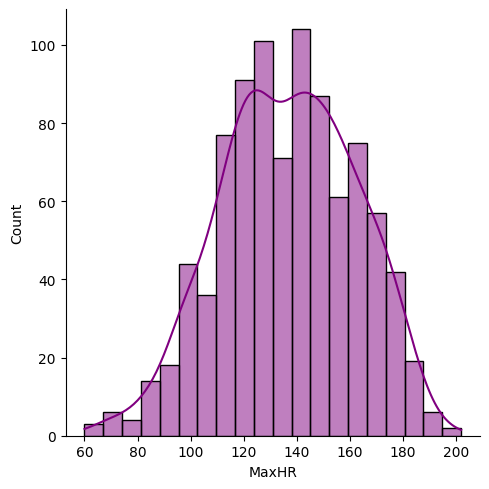

In [245]:
sns.displot(heart_df['MaxHR'], color = 'Purple', kde = True)

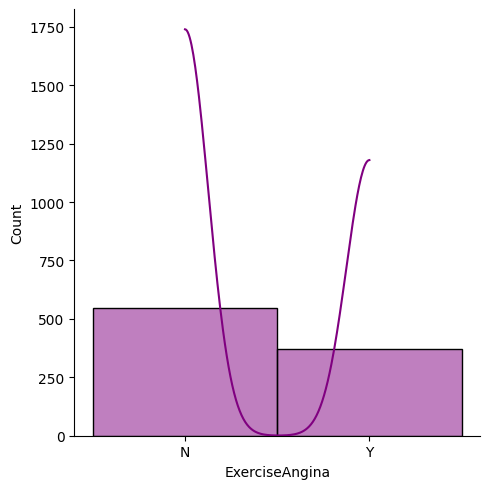

In [246]:
sns.displot(heart_df['ExerciseAngina'], color = 'Purple', kde = True)

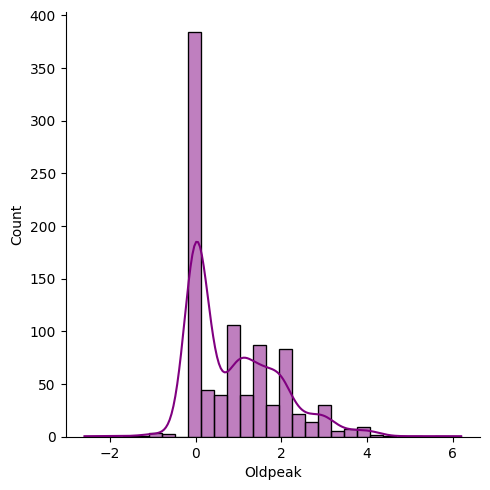

In [247]:
sns.displot(heart_df['Oldpeak'], color = 'Purple', kde = True)

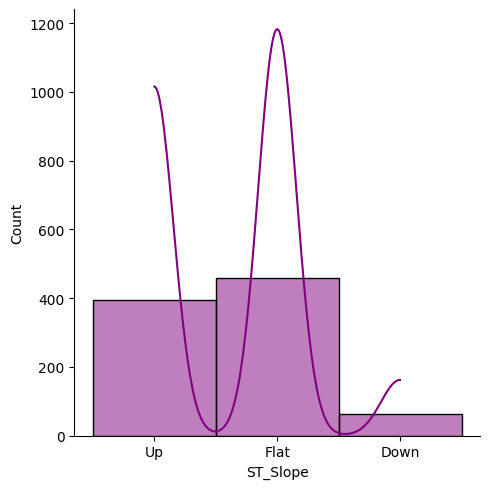

In [248]:
sns.displot(heart_df['ST_Slope'], color = 'Purple', kde = True)

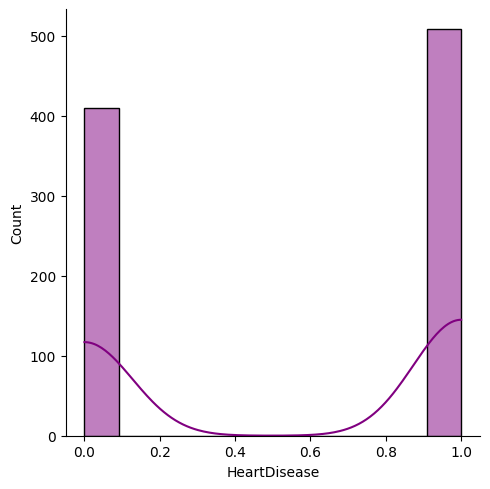

In [249]:
sns.displot(heart_df['HeartDisease'], color = 'Purple', kde = True)

### <font color=Purple>Data Transformation on Categorical Features</font>

<font color=Purple>Let's first visualise the outliers which may be present in our dataset, through boxplots</font>

In [250]:
# Select categorical variables
categ = heart_df.select_dtypes(include=object).columns

# One hot encoding
heart_df_encoded = pd.get_dummies(heart_df, columns=categ, drop_first=True)  
heart_df_encoded.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0   40        140          289          0    172      0.0             0   
1   49        160          180          0    156      1.0             1   
2   37        130          283          0     98      0.0             0   
3   48        138          214          0    108      1.5             1   
4   54        150          195          0    122      0.0             0   

   Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      1                  1                  0                 0   
1      0                  0                  1                 0   
2      1                  1                  0                 0   
3      0                  0                  0                 0   
4      1                  0                  1                 0   

   RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
0                  1              0                 0              0   
1                  1              0                 0              1   
2                  0              1                 0              0   
3                  1              0                 1              1   
4                  1              0                 0              0   

   ST_Slope_Up  
0            1  
1            0  
2            1  
3            0  
4            1

In [251]:
heart_df_encoded.tail()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
913      1                  0                  0                 1   
914      1                  0                  0                 0   
915      1                  0                  0                 0   
916      0                  1                  0                 0   
917      1                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  ST_Slope_Flat  \
913                  1              0                 0              1   
914                  1              0                 0              1   
915                  1              0                 1              1   
916                  0              0                 0              1   
917                  1              0                 0              0   

     ST_Slope_Up  
913            0  
914            0  
915            0  
916            0  
917            1

### <font color=Purple>END OF THE NOTEBOOK</font>

# <font color=Purple>COMP5310 - Project Stage 2 - Data Summarisation and Analysis</font> ❤️‍🩹

<font color=Purple>This section of the notebook contains the EDA and some data visualisations for us to grasp a better understanding of the dataset, providing a thorough summary and analysis. The majority of the data transformations has been completed in stage 1, here we will be describing and visualising the dataset as our main focus.</font> 

<font color=Red>Not all plots have been included in the report</font>

### <font color=Purple>Pie charts for Categorical columns</font>

<Axes: >

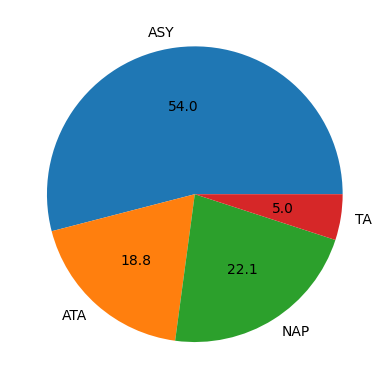

In [252]:
heart_df.groupby('ChestPainType').size().plot(kind = 'pie', autopct = '%.1f')

<Axes: >

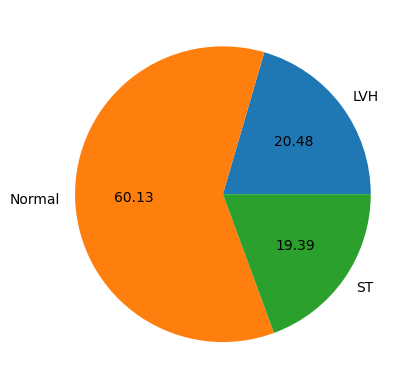

In [253]:
heart_df.groupby('RestingECG').size().plot(kind = 'pie', autopct = '%.2f')

<Axes: >

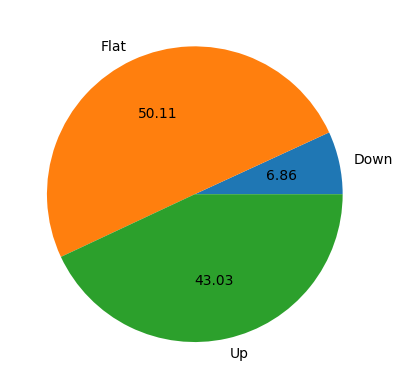

In [254]:
heart_df.groupby('ST_Slope').size().plot(kind = 'pie', autopct = '%.2f')

<Axes: >

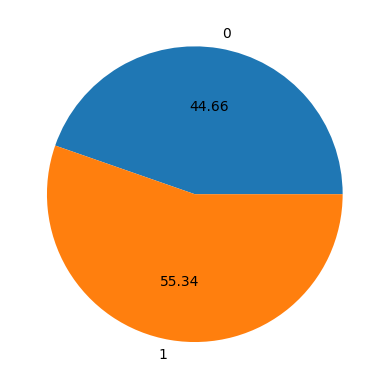

In [255]:
heart_df.groupby('HeartDisease').size().plot(kind = 'pie', autopct = '%.2f')

### <font color=Purple>Pair plots using seaborn library</font>

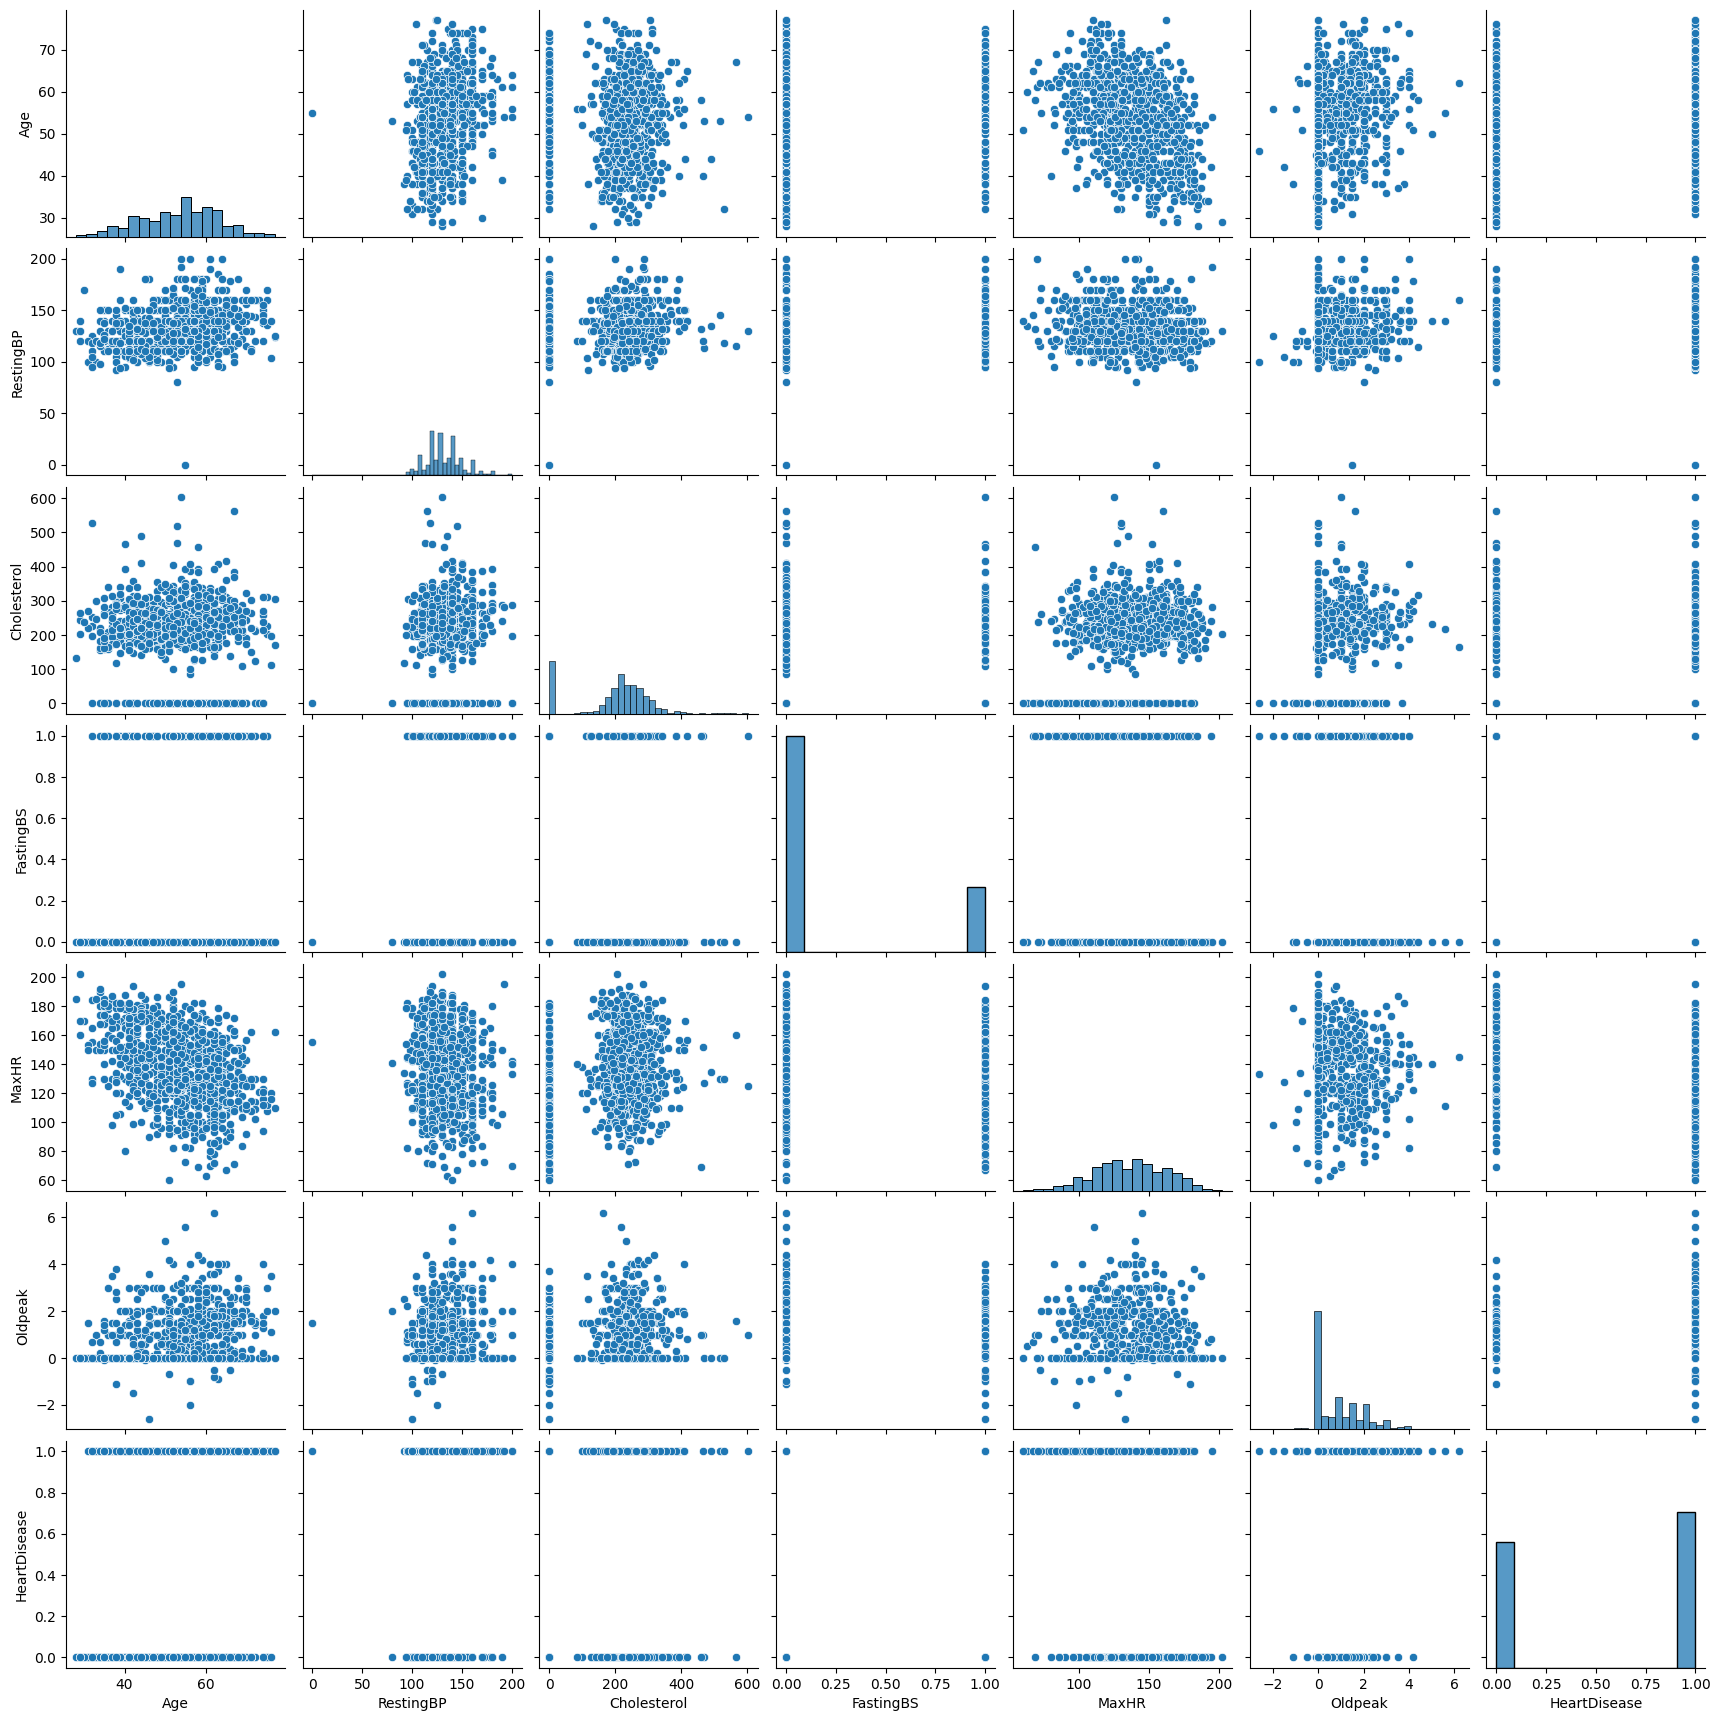

In [256]:
sns.pairplot(heart_df)

### <font color=Purple>Violin Plots</font>

<font color=Purple>Violin plots are useful for visualising the distribution of data and its density. Although similar to box plots and histograms, violin plots will provide a different perspective on how each variable is distributed.</font>

<Axes: xlabel='HeartDisease', ylabel='Sex'>

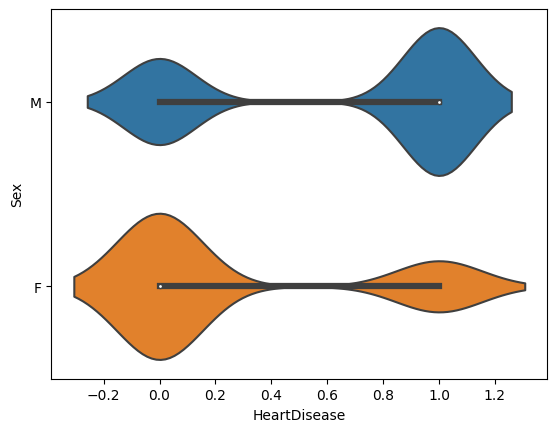

In [257]:
sns.violinplot(x = heart_df['HeartDisease'], y = heart_df['Sex'])

<Axes: xlabel='HeartDisease', ylabel='Age'>

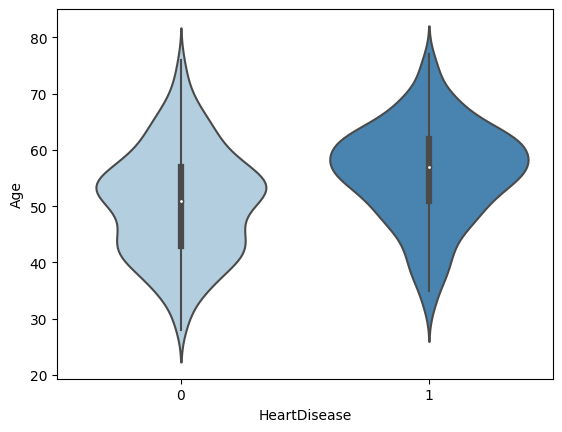

In [258]:
sns.violinplot(x = heart_df['HeartDisease'], y = heart_df['Age'], palette = 'Blues')

### <font color=Purple>Joinplots (scatter plots and histograms)</font>

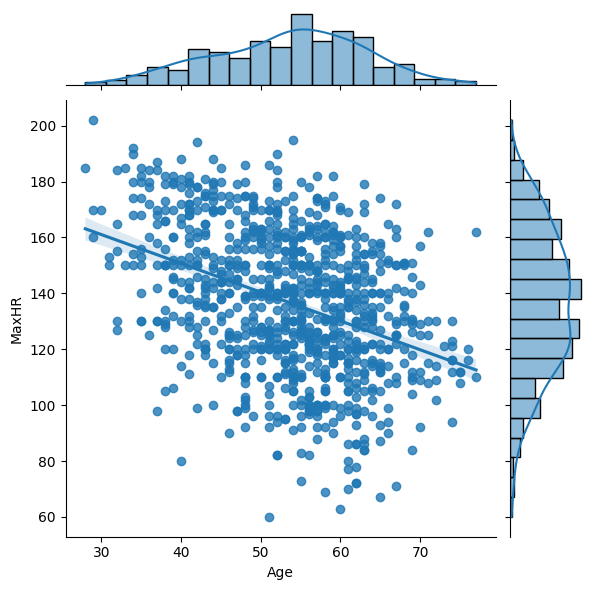

In [259]:
sns.jointplot(x = 'Age',y = 'MaxHR',data = heart_df,kind = 'reg')

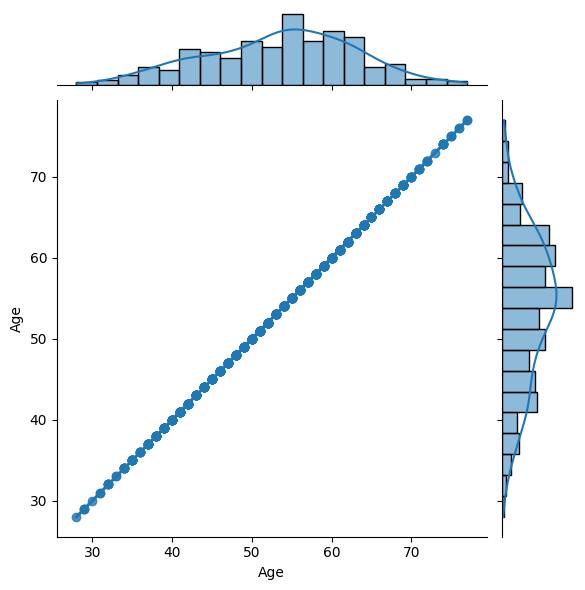

In [260]:
sns.jointplot(x = 'Age',y='Age',data = heart_df,kind = 'reg')

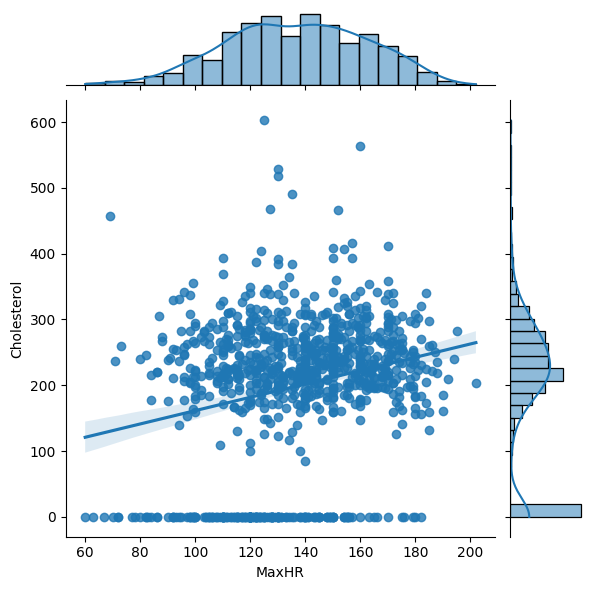

In [261]:
sns.jointplot(x ='MaxHR',y = 'Cholesterol',data = heart_df,kind = 'reg')

In [262]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### <font color=Purple>EDA Summary of heart_df</font>

In [263]:
import pandas_profiling

In [264]:
heart_df.profile_report(title='Heart Attack EDA Summary',progress_bar=False)

In [265]:
# Removing negative values in Oldpeak
heart_df = heart_df[heart_df["Oldpeak"] > 0]
heart_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1     49   F           NAP        160          180          0     Normal   
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
11    58   M           ATA        136          164          0         ST   
13    49   M           ASY        140          234          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
911   59   M           ASY        164          176          1        LVH   
912   57   F           ASY        140          241          0     Normal   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1      156              N      1.0     Flat             1  
3      108              Y      1.5     Flat             1  
8      130              Y      1.5     Flat             1  
11      99              Y      2.0     Flat             1  
13     140              Y      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
911     90              N      1.0     Flat             1  
912    123              Y      0.2     Flat             1  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  

[537 rows x 12 columns]

### <font color=Purple>Boxplots and outliers</font>

Text(0.5, 1.0, 'HeartDisease over Age')

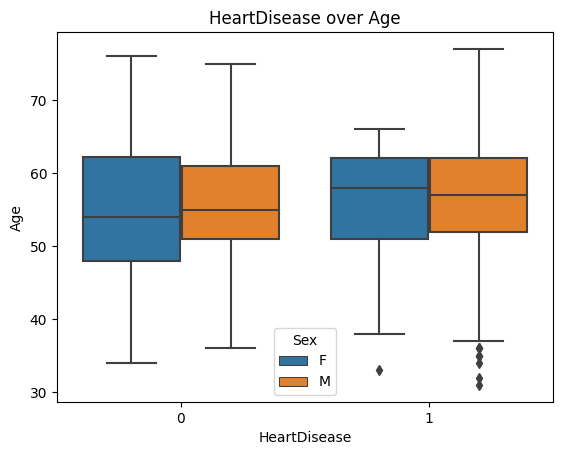

In [266]:
sns.boxplot(data=heart_df,x='HeartDisease',y='Age',hue='Sex')
plt.title('HeartDisease over Age')

In [267]:
# Removing zeros in RestingBP
heart_df = heart_df[heart_df["RestingBP"] != 0]
heart_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1     49   F           NAP        160          180          0     Normal   
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
11    58   M           ATA        136          164          0         ST   
13    49   M           ASY        140          234          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
911   59   M           ASY        164          176          1        LVH   
912   57   F           ASY        140          241          0     Normal   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1      156              N      1.0     Flat             1  
3      108              Y      1.5     Flat             1  
8      130              Y      1.5     Flat             1  
11      99              Y      2.0     Flat             1  
13     140              Y      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
911     90              N      1.0     Flat             1  
912    123              Y      0.2     Flat             1  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  

[536 rows x 12 columns]

Text(0.5, 1.0, 'HeartDisease over RestingBP')

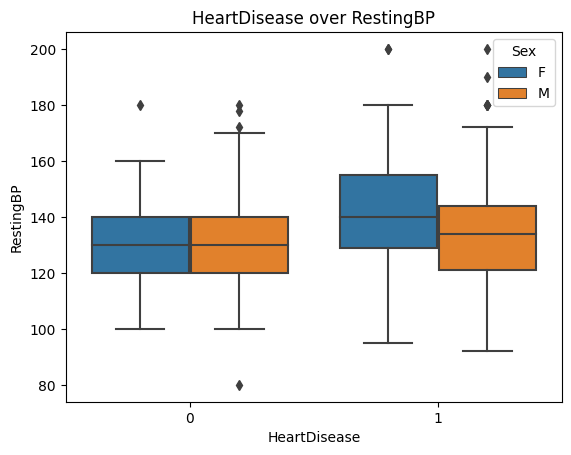

In [268]:
sns.boxplot(data=heart_df,x='HeartDisease',y='RestingBP',hue='Sex')
plt.title('HeartDisease over RestingBP')

In [269]:
# Removing zeros in Cholesterol 
heart_df = heart_df[heart_df["Cholesterol"] != 0]
heart_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
1     49   F           NAP        160          180          0     Normal   
3     48   F           ASY        138          214          0     Normal   
8     37   M           ASY        140          207          0     Normal   
11    58   M           ATA        136          164          0         ST   
13    49   M           ASY        140          234          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
911   59   M           ASY        164          176          1        LVH   
912   57   F           ASY        140          241          0     Normal   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
1      156              N      1.0     Flat             1  
3      108              Y      1.5     Flat             1  
8      130              Y      1.5     Flat             1  
11      99              Y      2.0     Flat             1  
13     140              Y      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
911     90              N      1.0     Flat             1  
912    123              Y      0.2     Flat             1  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  

[428 rows x 12 columns]

Text(0.5, 1.0, 'HeartDisease over Cholesterol')

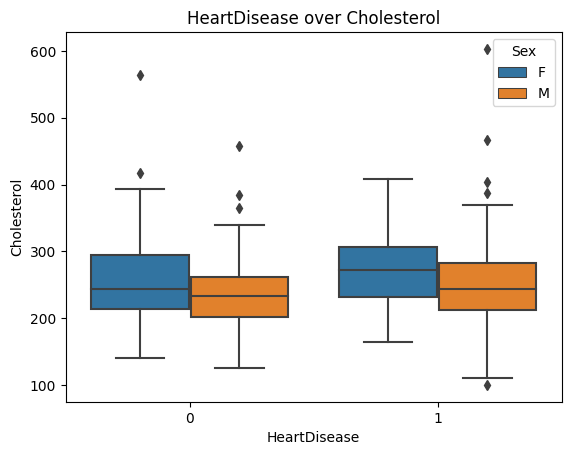

In [270]:
sns.boxplot(data=heart_df,x='HeartDisease',y='Cholesterol',hue='Sex')
plt.title('HeartDisease over Cholesterol')

Text(0.5, 1.0, 'HeartDisease over MaxHR')

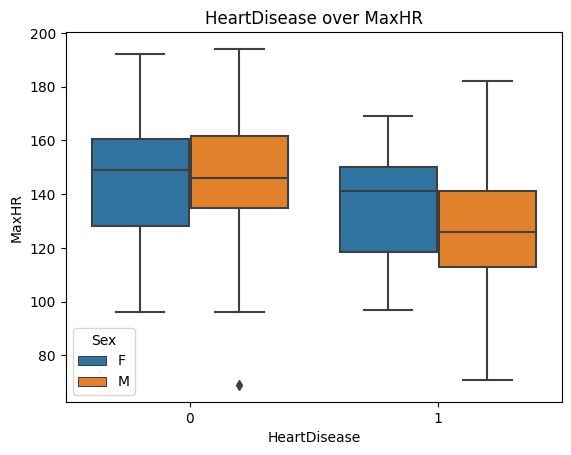

In [271]:
sns.boxplot(data=heart_df,x='HeartDisease',y='MaxHR',hue='Sex')
plt.title('HeartDisease over MaxHR')

Text(0.5, 1.0, 'HeartDisease over Oldpeak')

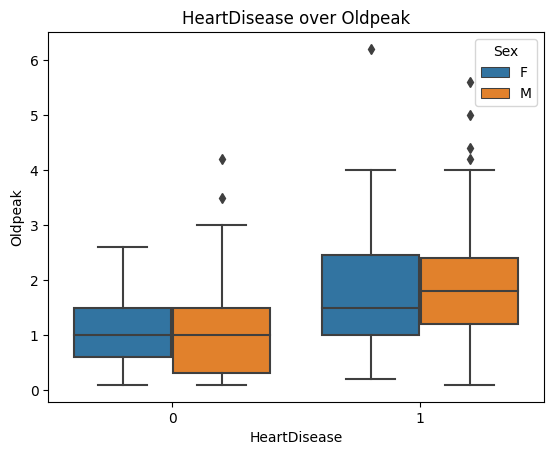

In [272]:
sns.boxplot(data=heart_df,x='HeartDisease',y='Oldpeak',hue='Sex')
plt.title('HeartDisease over Oldpeak')

# <font color=Purple>COMP5310 - Project Stage 3 - Experiment, Quantify, Report</font> ❤️‍🩹

### <font color=Purple>Feature</font>

<font color=Purple>The patient's blood pressure is represented by restingBP. It is impossible to have values equal to 0, so we run median imputation to the outliers.</font>

In [273]:
def find_outliers(heart_df, features):
  df_copy = heart_df.drop(heart_df[(heart_df[features] == 0)].index)

  # 1st quartile
  q1 = df_copy[features].quantile(0.25) 
  # 3rd quartile
  q3 = df_copy[features].quantile(0.75) 
  iqr = q3 - q1

  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  outlier_list_col = df_copy[(df_copy[features] >= Upper_tail) | (df_copy[features] <= Lower_tail)]
  return pd.DataFrame(outlier_list_col)

In [274]:
RestingBP_new = find_outliers(heart_df, 'RestingBP')
RestingBP_new.value_counts(RestingBP_new['HeartDisease'])

HeartDisease
1    9
0    2
dtype: int64

In [275]:
Cholesterol_new = find_outliers(heart_df, 'Cholesterol')
Cholesterol_new.value_counts(Cholesterol_new['HeartDisease'])

HeartDisease
1    9
0    5
dtype: int64

In [276]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
cols_to_use = ['Cholesterol', 'RestingBP']
imputer.fit(heart_df[cols_to_use])

SimpleImputer(strategy='median')

In [277]:
heart_df[cols_to_use] = imputer.transform(heart_df[cols_to_use])

In [278]:
heart_df.ChestPainType.value_counts()

ASY    269
NAP     84
ATA     45
TA      30
Name: ChestPainType, dtype: int64

<font color=Purple>Dividing the ages into groups</font>

In [279]:
heart_df['AgeGroup'] = np.nan
heart_df.loc[(heart_df['Age'] >= 28) & (heart_df['Age'] < 35), 'AgeGroup'] = 'Young Adult'

In [280]:
heart_df.loc[(heart_df['Age'] >= 35) & (heart_df['Age'] <= 64), 'AgeGroup'] = 'Adult'
heart_df.loc[heart_df['Age'] > 64, 'AgeGroup'] = 'Seniors'

In [281]:
heart_df.drop(['Age'], axis = 1, inplace = True)

In [282]:
heart_df

Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
1     F           NAP      160.0        180.0          0     Normal    156   
3     F           ASY      138.0        214.0          0     Normal    108   
8     M           ASY      140.0        207.0          0     Normal    130   
11    M           ATA      136.0        164.0          0         ST     99   
13    M           ASY      140.0        234.0          0     Normal    140   
..   ..           ...        ...          ...        ...        ...    ...   
911   M           ASY      164.0        176.0          1        LVH     90   
912   F           ASY      140.0        241.0          0     Normal    123   
913   M            TA      110.0        264.0          0     Normal    132   
914   M           ASY      144.0        193.0          1     Normal    141   
915   M           ASY      130.0        131.0          0     Normal    115   

    ExerciseAngina  Oldpeak ST_Slope  HeartDisease AgeGroup  
1                N      1.0     Flat             1    Adult  
3                Y      1.5     Flat             1    Adult  
8                Y      1.5     Flat             1    Adult  
11               Y      2.0     Flat             1    Adult  
13               Y      1.0     Flat             1    Adult  
..             ...      ...      ...           ...      ...  
911              N      1.0     Flat             1    Adult  
912              Y      0.2     Flat             1    Adult  
913              N      1.2     Flat             1    Adult  
914              N      3.4     Flat             1  Seniors  
915              Y      1.2     Flat             1    Adult  

[428 rows x 12 columns]

<font color=Purple>Encoding</font>

In [283]:
categ_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
              'ExerciseAngina', 'ST_Slope', 'AgeGroup']

In [284]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(heart_df, feature):
  label_encoder = LabelEncoder()
  heart_df[feature] = label_encoder.fit_transform(heart_df[feature])

In [285]:
for i in categ_cols:
  label_encoding(heart_df, i)

In [286]:
heart_df.head()

Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
1     0              2      160.0        180.0          0           1    156   
3     0              0      138.0        214.0          0           1    108   
8     1              0      140.0        207.0          0           1    130   
11    1              1      136.0        164.0          0           2     99   
13    1              0      140.0        234.0          0           1    140   

    ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  AgeGroup  
1                0      1.0         1             1         0  
3                1      1.5         1             1         0  
8                1      1.5         1             1         0  
11               1      2.0         1             1         0  
13               1      1.0         1             1         0

In [287]:
numeric_cols = ['RestingBP', 'Cholesterol', 'MaxHR']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [288]:
# Scaling the dataset
heart_df[numeric_cols] = scaler.fit_transform(heart_df[numeric_cols])

In [289]:
heart_df.head()

Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
1     0              2   1.424311    -1.136200          0           1   
3     0              0   0.157420    -0.571225          0           1   
8     1              0   0.272591    -0.687544          0           1   
11    1              1   0.042248    -1.402071          0           2   
13    1              0   0.272591    -0.238887          0           1   

       MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  AgeGroup  
1   0.942199               0      1.0         1             1         0  
3  -1.180229               1      1.5         1             1         0  
8  -0.207449               1      1.5         1             1         0  
11 -1.578184               1      2.0         1             1         0  
13  0.234723               1      1.0         1             1         0

<font color=Purple>Train test split</font>

In [290]:
X, Y = heart_df.drop(columns = 'HeartDisease'), heart_df['HeartDisease']

In [291]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

### <font color=Purple>Logistic Regression</font>

In [292]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [293]:
logistic_reg.fit(X_train, Y_train)

LogisticRegression()

In [294]:
Y_pred = logistic_reg.predict(X_test)

In [295]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [296]:
logistic_reg_acc = accuracy_score(Y_test, Y_pred) 
logistic_reg_acc

0.813953488372093

<Axes: >

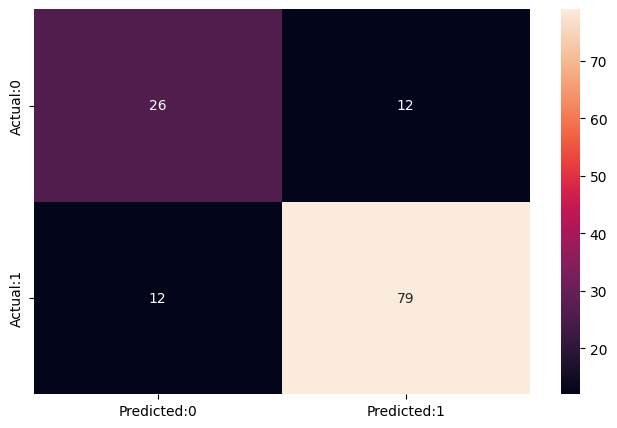

In [297]:
cm = confusion_matrix(Y_test, Y_pred) 
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'],
                           index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

### <font color=Purple>K-Nearest Neighbour Classifier</font>

In [298]:
# Building a model using KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [299]:
Y_pred = knn.predict(X_test)

In [300]:
knn_acc = accuracy_score(Y_test, Y_pred) 
knn_acc

0.8062015503875969

### <font color=Purple>Finding the optimal K value</font>

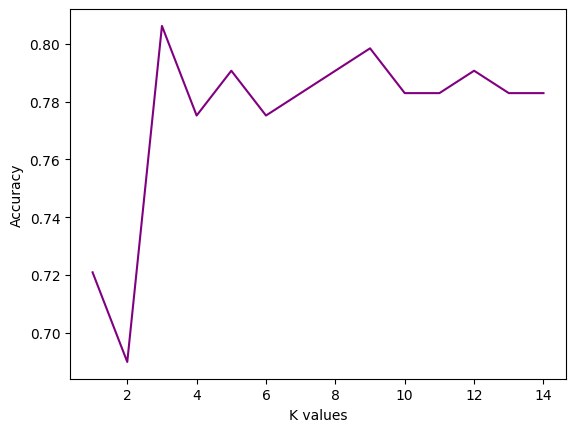

Best K values: 3 and highest accuracy is: 0.8062015503875969 


In [339]:
# Lists for values
train_accuracy = []
test_accuracy = []

for i in range(1, 15):

  # Test kNN algorithm
  knn_2 = KNeighborsClassifier(n_neighbors = i) 

  train_accuracy.append(knn_2.fit(X_train, Y_train))
  test_accuracy.append(knn_2.score(X_test, Y_test))

# Plotting
plt.plot(range(1, 15), test_accuracy, color = 'purple')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.show()

print("Best K values: {} and highest accuracy is: {} ".format(1 + test_accuracy.index(np.max(test_accuracy)),
                                                              np.max(test_accuracy)))

<Axes: >

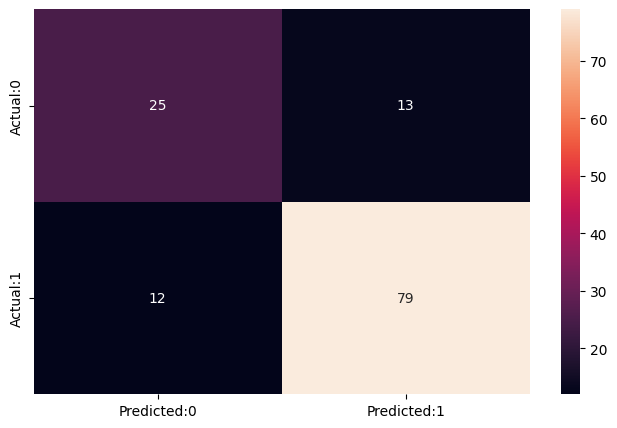

In [302]:
cm = confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

### <font color=Purple>Decision Tree Classifier</font>

In [303]:
# Decision Tree Model 
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 42) 
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [304]:
Y_pred = clf.predict(X_test)

In [305]:
clf_acc = accuracy_score(Y_test, Y_pred)
clf_acc

0.6744186046511628

<Axes: >

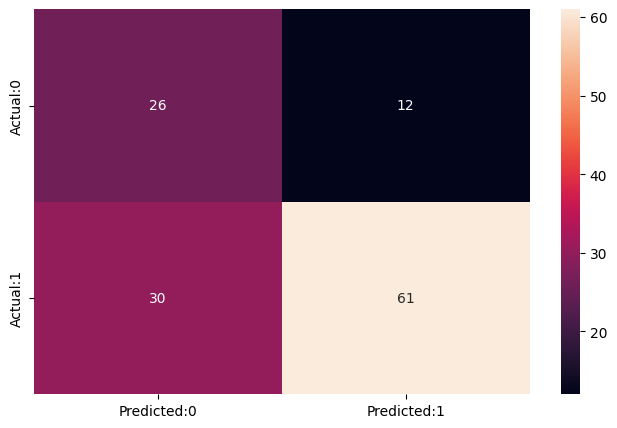

In [306]:
cm = confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

### <font color=Purple>Support Vector Machine</font>

In [307]:
from sklearn.svm import SVC
svm_model = SVC(random_state = 42) 
svm_model.fit(X_train, Y_train)

SVC(random_state=42)

In [308]:
Y_pred = svm_model.predict(X_test)

In [309]:
svm_model_acc = accuracy_score(Y_test, Y_pred) 
svm_model_acc

0.751937984496124

<Axes: >

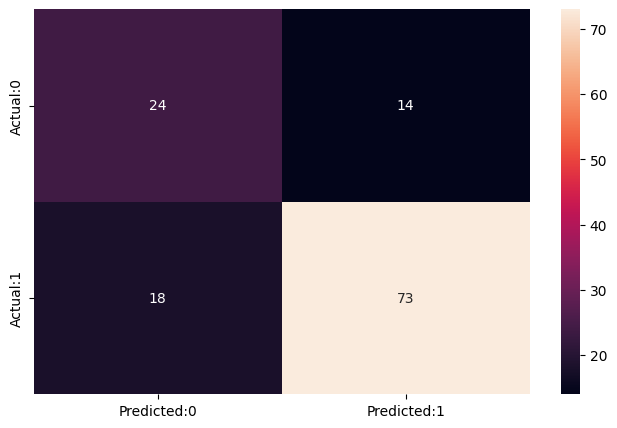

In [310]:
cm = confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d')

### <font color=Purple>Naive Bayes</font>

In [311]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

# Training our model 
nb.fit(X_train, Y_train) 

y_pred = nb.predict(X_test)

In [312]:
# Accuracy score
print("Accuracy of Naive Bayes: {}\n".format(nb.score(X_test, Y_test)))

# Confusion matrix
cm = confusion_matrix(Y_test, Y_pred) 
print("Confusion matrix of Naive Bayes:\n {}".format(cm))

Accuracy of Naive Bayes: 0.8062015503875969

Confusion matrix of Naive Bayes:
 [[24 14]
 [18 73]]


In [313]:
y_pred = nb.predict(X_test)
nb_acc = accuracy_score(Y_test, y_pred) 

### <font color=Purple>Comparison</font>

In [314]:
data = {'Estimators':['Logistic Regression', 'K-Nearest Neighbour',
        'Decision Tree', 'Support Vector Machine', 'Naive Bayes'],
        'Accuracy':[logistic_reg_acc, knn_acc, clf_acc, svm_model_acc, nb_acc]}

In [315]:
data = pd.DataFrame(data) 
data.sort_values('Accuracy', ascending = False)

Estimators  Accuracy
0     Logistic Regression  0.813953
1     K-Nearest Neighbour  0.806202
4             Naive Bayes  0.806202
3  Support Vector Machine  0.751938
2           Decision Tree  0.674419

<font color=Purple>Logistic Regression is the best among all of the estimators.</font>

### <font color=Purple>Grid Search</font>

In [316]:
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

# The grid search object
gridsearch = GridSearchCV(logistic_reg,
                          param_grid = parameters, 
                          cv = 10)

# Performing grid search 
gridsearch = gridsearch.fit(X_train, Y_train)

print("best param: ", gridsearch.best_params_)

best param:  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [317]:
best_params = gridsearch.best_params_
logistic_reg = LogisticRegression(random_state = 42, **best_params) 

logistic_reg = logistic_reg.fit(X_train, Y_train) 
Y_pred = logistic_reg.predict(X_test)

In [318]:
print('Accuracy score: ', accuracy_score(Y_test, Y_pred))

Accuracy score:  0.813953488372093


### <font color=Purple>Feature Importances</font>

<font color=Purple>Most important features according to this model</font>

In [319]:
feature_imp = pd.Series(clf.feature_importances_, index = X.columns).sort_values(ascending = False) 
feature_imp

ExerciseAngina    0.280583
Cholesterol       0.156998
Oldpeak           0.145700
MaxHR             0.101626
RestingBP         0.094404
ST_Slope          0.083771
ChestPainType     0.077404
Sex               0.059512
FastingBS         0.000000
RestingECG        0.000000
AgeGroup          0.000000
dtype: float64

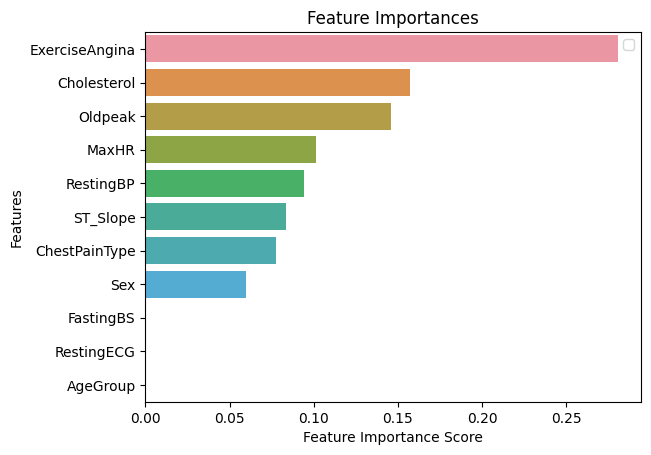

In [320]:
sns.barplot(x = feature_imp, y = feature_imp.index) 
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importances")
plt.legend()
plt.show()

<font color=Purple>Permutation importance orders the most important predictive features slightly differently.</font>

In [321]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [322]:
import eli5
from eli5.sklearn import PermutationImportance

In [323]:
perm = PermutationImportance(clf, random_state = 1).fit(X_train, Y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

### <font color=Purple>ROC-UAC</font>

In [324]:
from sklearn import metrics
Y_pred_probs = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test, Y_pred_probs)
auc = metrics.roc_auc_score(Y_test, Y_pred_probs)

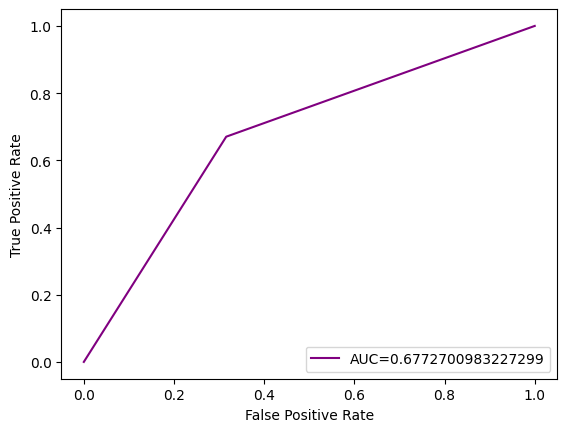

In [348]:
# roc curve with AUC score
plt.plot(fpr, tpr, label = "AUC="+str(auc), color = 'purple')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4) 
plt.show()

### <font color=Purple>Random Forest</font>

In [345]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 13, random_state = 42) 
rf.fit(X_train, Y_train) 

y_pred = rf.predict(X_test)

In [346]:
# Accuracy score
print("Accuracy of Random Forest: {}\n".format(rf.score(X_test, Y_test)))

# Confusion matrix
cm = confusion_matrix(Y_test, y_pred) 

print("Confusion matrix of Random Forest:\n {}".format(cm))

Accuracy of Random Forest: 0.7751937984496124

Confusion matrix of Random Forest:
 [[25 13]
 [16 75]]


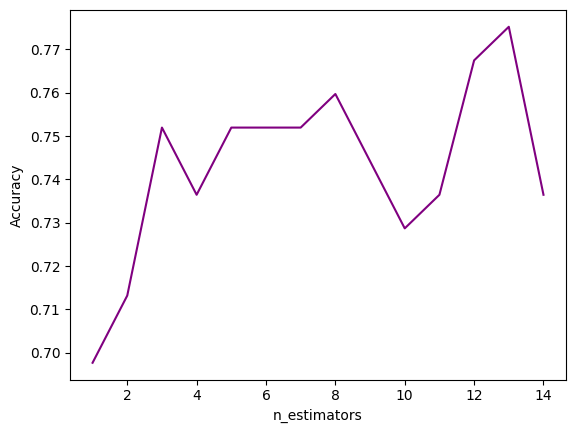

Best n_estimators is 13 and higher accuracy is 0.7751937984496124


In [347]:
# Lists of accuracy values of train and test 
accuracy_train = []
accuracy_test = []

for i in range(1, 15):

  # Training the models
  rf_2 = RandomForestClassifier(n_estimators = i, random_state = 42) 

  # Training data
  accuracy_train.append(rf_2.fit(X_train, Y_train))

  # Test data 
  accuracy_test.append(rf_2.score(X_test, Y_test))

# Plotting
plt.plot(range(1, 15), accuracy_test, color = 'purple') 
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

print("Best n_estimators is {} and higher accuracy is {}".format(1 + accuracy_test.index(np.max(accuracy_test)), 
                                                                 np.max(accuracy_test)))

### <font color=Purple>END OF THE NOTEBOOK</font>